Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

# Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [ ]:
df=pd.read_csv("crime_data.csv",index_col=[0])

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
df.shape

(50, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [ ]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
df_norm=StandardScaler().fit_transform(df)
df_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(df_norm)

DBSCAN(eps=1, min_samples=4)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Adding clusters to dataset
df['clusters']=dbscan.labels_
df

,Murder,Assault,UrbanPop,Rape,clusters
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,-1
Arkansas,8.8,190,50,19.5,-1
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,-1
Florida,15.4,335,80,31.9,-1
Georgia,17.4,211,60,25.8,-1


In [ ]:
df.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


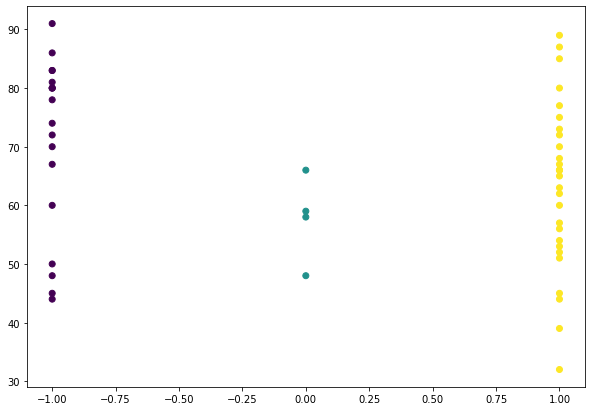

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df['clusters'],df['UrbanPop'], c=dbscan.labels_) 

In [ ]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,355851.821600
1,2,96406.128309
2,3,47981.717143
3,4,34745.881143
4,5,24434.087810
5,6,18777.350667
6,7,15788.835429
7,8,13338.557214
8,9,11518.802603
9,10,10266.209048


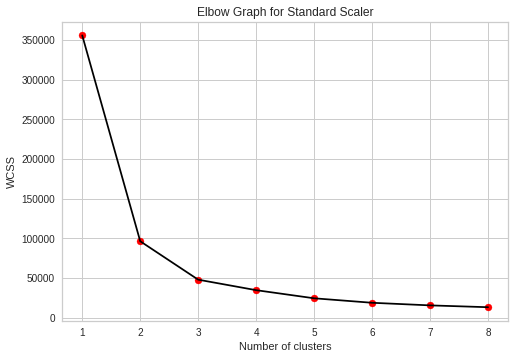

In [ ]:

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


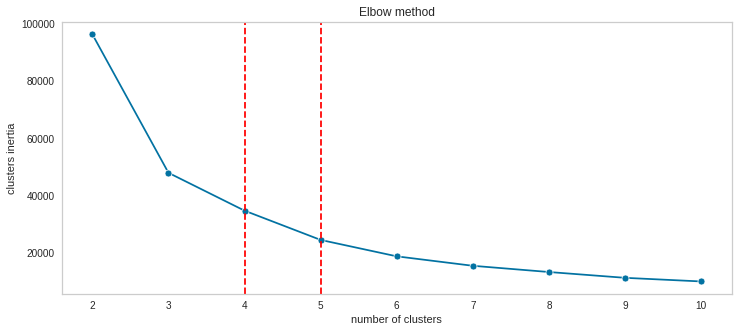

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(df)
y_predict_kmeans.shape

(50,)

In [ ]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1], dtype=int32)

In [ ]:
model_kmeans.labels_

array([2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1], dtype=int32)

In [ ]:
model_kmeans.cluster_centers_

array([[  4.27      ,  87.55      ,  59.75      ,  14.39      ,
          0.9       ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714,
          0.35714286],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ,
         -0.8125    ]])

In [ ]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

47981.717142857146

In [ ]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

In [ ]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,clusters
,mean,mean,mean,mean,mean
Kmeans_label,,,,,
0,4.270000,87.550000,59.750000,14.390000,0.900000
1,8.214286,173.285714,70.642857,22.842857,0.357143
2,11.812500,272.562500,68.312500,28.375000,-0.812500


In [ ]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(df)
y_predict_kmeans.shape

(50,)

In [ ]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
model_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
model_kmeans.cluster_centers_

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586,
          0.93103448,   0.31034483],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571,
         -0.80952381,   1.76190476]])

In [ ]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

96416.14472906402

In [ ]:

#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_


# hierarchial clustering

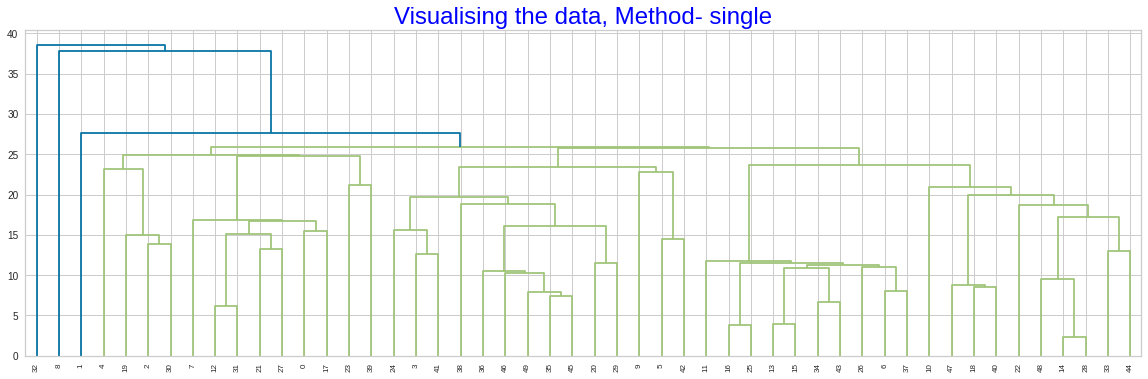

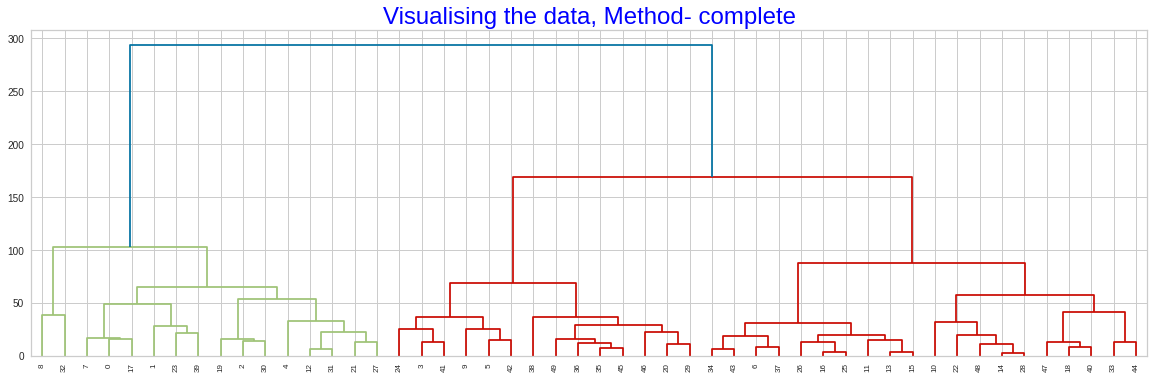

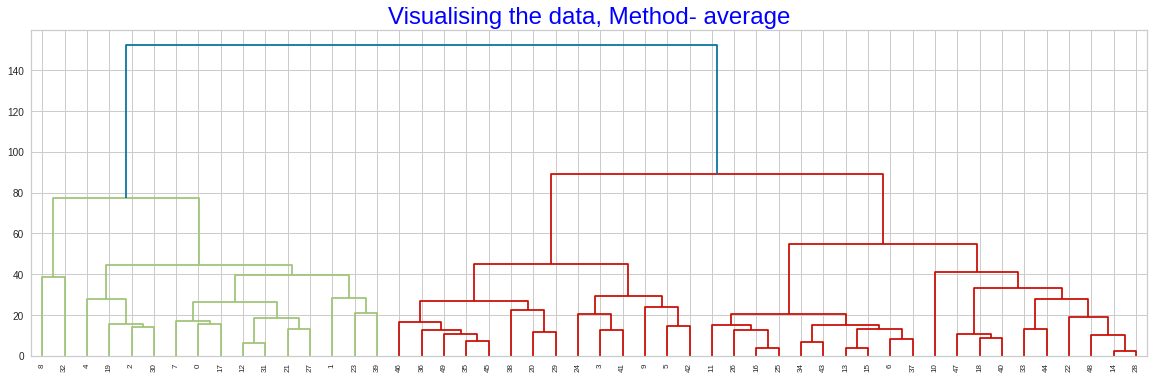

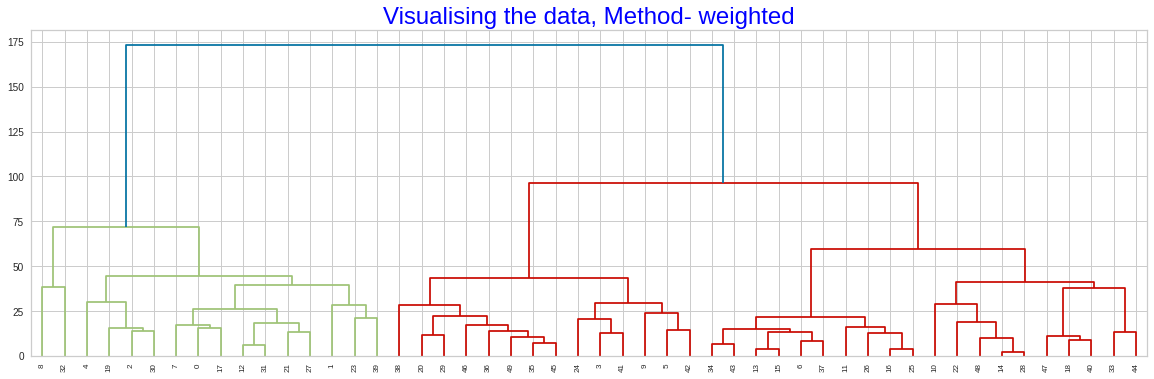

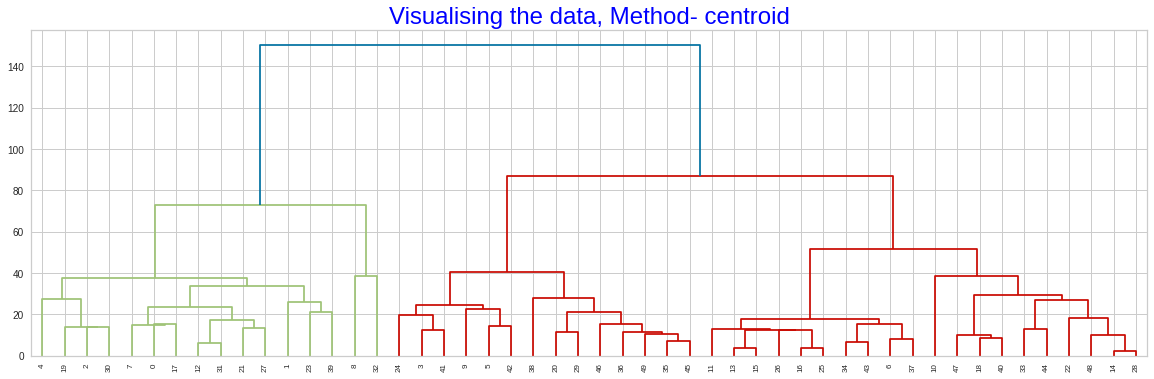

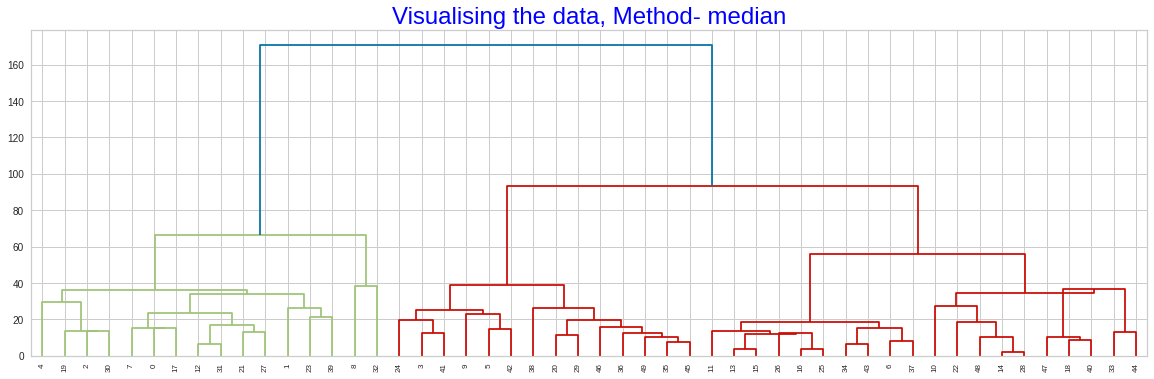

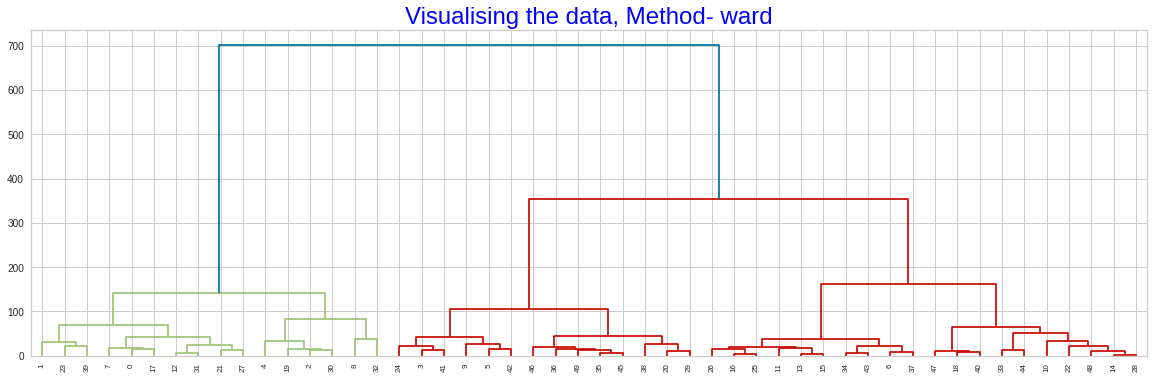

In [ ]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(df, method = methods,optimal_ordering=False))

In [ ]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(df)
        silhouette_score1 = sil(df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5762444233134609
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.5762444233134609
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5762444233134609
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3029034997644067

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5318217828092028
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318217828092028
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5318217828092028
For n_clusters = 3 The average silhouette_score with linkage- single : 0.30441214537546907

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.5010992392998191
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4998558395487027
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4998558395487027
For 

In [ ]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(df)
        silhouette_score1 = sil(df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5762444233134609
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.5762444233134609
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5762444233134609
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3029034997644067

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5318217828092028
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318217828092028
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5318217828092028
For n_clusters = 3 The average silhouette_score with linkage- single : 0.30441214537546907

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.5010992392998191
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4998558395487027
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4998558395487027
For 

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
agg_clustering.n_clusters_

2

In [ ]:
(sil(df, agg_clustering.labels_)*100).round(3)

57.624

In [ ]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_

In [ ]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,clusters,Kmeans_label
,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,
0,5.894118,122.852941,64.235294,17.870588,0.676471,0.147059
1,11.812500,272.562500,68.312500,28.375000,-0.812500,1.000000


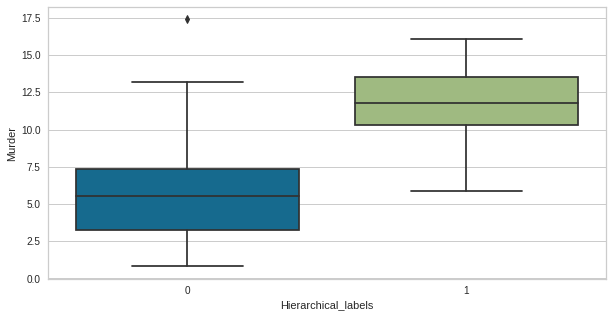

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Murder', data=df)

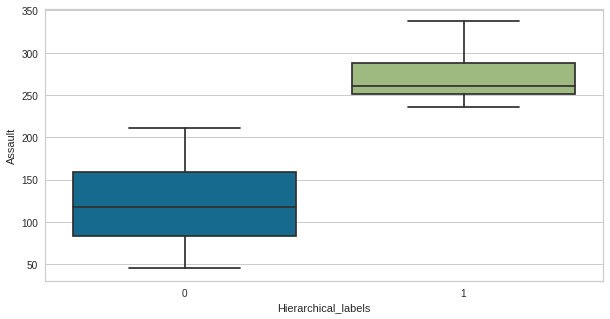

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Assault', data=df)

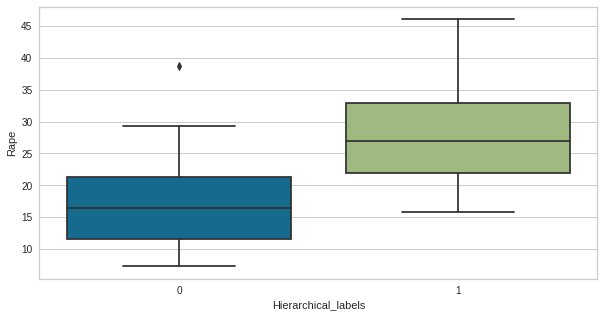

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Rape', data=df)


# Conclusion:
I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
Applied Standardazation & MinMaxScalar transformation on the data t
I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.
By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.
KMeans clustering is sensitive to outliers